In [1]:
import custom_functions_pydeseqEnv as cf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scanpy as sc
import seaborn as sns
import warnings

from custom_functions_pydeseqEnv import plot_volcano_df, plot_volcano_df_html, return_de
from matplotlib.pyplot import rc_context
from venny4py.venny4py import *

In [2]:
deseqResults_all = pd.read_csv('../output/DEGs/taPVAT_all_comparisons_deseq_all_genes_all.txt', sep = '\t')
deseqResults_all.replace(np.nan, 'None', inplace=True)
deseqResults_all

/tmp/local/44668409/ipykernel_637063/3246913054.py:1: DtypeWarning: Columns (12,13,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  deseqResults_all = pd.read_csv('../output/DEGs/taPVAT_all_comparisons_deseq_all_genes_all.txt', sep = '\t')


,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id,celltype,group,group1,group2,subset,sub_id,subset_2,subset_id_2,level,sub_2,sub_id_2
0,3110082J24Rik,32.333176,0.266062,0.368625,0.721767,0.470438,0.721385,3110082J24Rik,whole_tissue,diet,Control,HF,None,None,None,None,high,None,None
1,4930455H04Rik,4.395147,0.037217,0.380636,0.097776,0.922110,0.973338,4930455H04Rik,whole_tissue,diet,Control,HF,None,None,None,None,high,None,None
2,6330411D24Rik,14.219259,0.008650,0.313426,0.027597,0.977984,0.992481,6330411D24Rik,whole_tissue,diet,Control,HF,None,None,None,None,high,None,None
3,A3galt2,19.749140,-0.377104,0.257251,-1.465900,0.142676,0.386257,A3galt2,whole_tissue,diet,Control,HF,None,None,None,None,high,None,None
4,AABR07000398.1,10208.553315,0.001530,0.206919,0.007396,0.994099,0.997555,AABR07000398.1,whole_tissue,diet,Control,HF,None,None,None,None,high,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659706,Zzef1,2.744123,-0.330367,1.016586,-0.324977,0.745198,0.999984,Zzef1,SMCs,diet,Control,HF,time,24W,None,None,low,sex,F
5659707,Zzz3,2.144385,-0.422029,1.096022,-0.385055,0.700197,0.999984,Zzz3,SMCs,diet,Control,HF,time,24W,None,None,low,sex,F
5659708,mrpl11,0.903071,-0.469128,2.124507,-0.220818,0.825235,0.999984,mrpl11,SMCs,diet,Control,HF,time,24W,None,None,low,sex,F
5659709,mrpl24,0.389941,1.047237,2.288470,0.457614,0.647230,0.999984,mrpl24,SMCs,diet,Control,HF,time,24W,None,None,low,sex,F


In [3]:
### Include only celltype_broad categories for now
celltype_list = ['Adipocytes', 'Endothelial_Cells', 'Fibroblasts', 'Immune_Cells', 'Mesothelial_Cells', 'Neuronal_Cells', 'Pericytes', 'SMCs']
deseqResults_all = deseqResults_all[deseqResults_all.celltype.isin(celltype_list)]
deseqResults_all

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id,celltype,group,group1,group2,subset,sub_id,subset_2,subset_id_2,level,sub_2,sub_id_2
49509,3110082J24Rik,31.829409,0.158600,0.378698,0.418802,0.675361,0.827128,3110082J24Rik,Adipocytes,diet,Control,HF,None,None,None,None,high,None,None
49510,4930455H04Rik,3.198805,0.265127,0.485183,0.546447,0.584759,0.767462,4930455H04Rik,Adipocytes,diet,Control,HF,None,None,None,None,high,None,None
49511,6330411D24Rik,4.262944,0.999924,0.665392,1.502761,0.132901,0.323154,6330411D24Rik,Adipocytes,diet,Control,HF,None,None,None,None,high,None,None
49512,A1cf,0.922657,1.381442,0.982203,1.406473,0.159584,0.361213,A1cf,Adipocytes,diet,Control,HF,None,None,None,None,high,None,None
49513,AABR07000398.1,8702.402830,-0.096636,0.230120,-0.419939,0.674530,0.826806,AABR07000398.1,Adipocytes,diet,Control,HF,None,None,None,None,high,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659706,Zzef1,2.744123,-0.330367,1.016586,-0.324977,0.745198,0.999984,Zzef1,SMCs,diet,Control,HF,time,24W,None,None,low,sex,F
5659707,Zzz3,2.144385,-0.422029,1.096022,-0.385055,0.700197,0.999984,Zzz3,SMCs,diet,Control,HF,time,24W,None,None,low,sex,F
5659708,mrpl11,0.903071,-0.469128,2.124507,-0.220818,0.825235,0.999984,mrpl11,SMCs,diet,Control,HF,time,24W,None,None,low,sex,F
5659709,mrpl24,0.389941,1.047237,2.288470,0.457614,0.647230,0.999984,mrpl24,SMCs,diet,Control,HF,time,24W,None,None,low,sex,F


### Test figure

In [4]:
degs = deseqResults_all[['gene_id','stat', 'pvalue','padj','log2FoldChange', 'celltype', 'group', 'sub_id', 'sub_id_2']]
degs_sig = degs[degs.padj < 0.05]

In [19]:
degs_sub = degs_sig[degs_sig.celltype == 'Endothelial_Cells']
degs_sub = degs_sub[degs_sub.group == 'time']
degs_sub = degs_sub[degs_sub.sub_id == 'None']
degs_sub = degs_sub[degs_sub.sub_id_2 == 'None']
degs_sub

,gene_id,stat,pvalue,padj,log2FoldChange,celltype,group,sub_id,sub_id_2
131836,AABR07007032.1,3.671058,0.000242,0.008286,0.602653,Endothelial_Cells,time,None,None
131843,AABR07019088.1,2.950265,0.003175,0.047488,0.574744,Endothelial_Cells,time,None,None
131845,AABR07019403.1,-3.507701,0.000452,0.012434,-1.183454,Endothelial_Cells,time,None,None
131859,AABR07032097.1,4.485330,0.000007,0.000623,1.950904,Endothelial_Cells,time,None,None
131870,AABR07042936.1,-3.135303,0.001717,0.031265,-1.670519,Endothelial_Cells,time,None,None
...,...,...,...,...,...,...,...,...,...
143485,Zfp710,2.989802,0.002792,0.043673,0.644027,Endothelial_Cells,time,None,None
143517,Zfp870,4.374719,0.000012,0.000908,2.326989,Endothelial_Cells,time,None,None
143518,Zfp9,-3.113157,0.001851,0.033096,-1.703550,Endothelial_Cells,time,None,None
143534,Zfpm2,-4.747138,0.000002,0.000248,-0.947405,Endothelial_Cells,time,None,None


In [21]:
degs_sub.sort_values("log2FoldChange", ascending = True)

,gene_id,stat,pvalue,padj,log2FoldChange,celltype,group,sub_id,sub_id_2
136348,Hcn1,-4.494083,6.987024e-06,0.000606,-3.029678,Endothelial_Cells,time,None,None
136215,Gria1,-5.333487,9.634443e-08,0.000028,-2.390380,Endothelial_Cells,time,None,None
139754,Prkcq,-3.586803,3.347568e-04,0.010227,-2.357185,Endothelial_Cells,time,None,None
133274,Ccdc183,-5.334511,9.580214e-08,0.000028,-2.356846,Endothelial_Cells,time,None,None
132889,Bdnf,-4.585483,4.529389e-06,0.000445,-2.171109,Endothelial_Cells,time,None,None
...,...,...,...,...,...,...,...,...,...
137302,LOC120098903,3.069608,2.143397e-03,0.036949,2.577301,Endothelial_Cells,time,None,None
137457,Lin7a,4.229102,2.346258e-05,0.001473,2.605503,Endothelial_Cells,time,None,None
136930,Kcnip1,3.263154,1.101795e-03,0.023071,2.908514,Endothelial_Cells,time,None,None
136797,Irf4,4.053478,5.046178e-05,0.002719,2.981696,Endothelial_Cells,time,None,None


### End of test figure

In [178]:
df_plot = deseqResults_all[(deseqResults_all.group == 'time') & \
                           (deseqResults_all.sub_id == 'HF') & \
                           (deseqResults_all.sub_id_2 == 'M') & \
                           (deseqResults_all.celltype == 'Adipocytes')].reset_index().copy()

In [179]:
df_plot.index = df_plot.gene_id

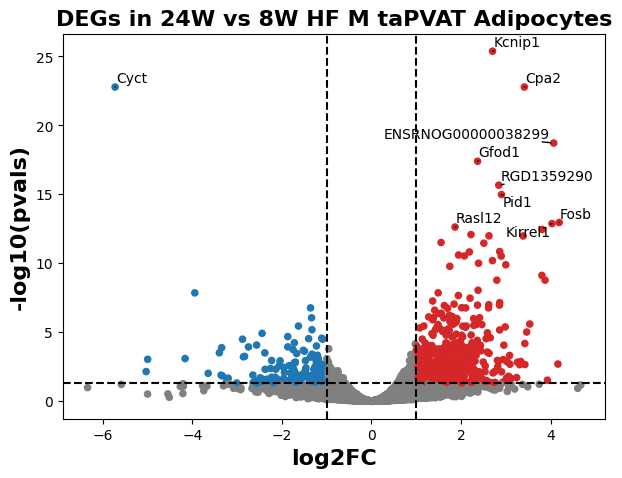

In [180]:
plot_volcano_df(df_plot, 'Adipocytes', 'time', '8W', '24W', '_HF_M', return_fig = True, save = False)
plt.show()

In [4]:
# get deg result
degs = deseqResults_all[['gene_id','stat', 'pvalue','padj','log2FoldChange', 'celltype', 'group', 'sub_id', 'sub_id_2']]
degs_sig = degs[degs.padj < 0.05]
degs_sig

,gene_id,stat,pvalue,padj,log2FoldChange,celltype,group,sub_id,sub_id_2
49522,AABR07002969.1,-3.268038,1.082957e-03,9.368799e-03,-0.429992,Adipocytes,diet,None,None
49527,AABR07005806.1,4.627919,3.693582e-06,8.079263e-05,3.718104,Adipocytes,diet,None,None
49531,AABR07007032.1,-3.769696,1.634463e-04,2.069026e-03,-0.515310,Adipocytes,diet,None,None
49557,AABR07019403.1,4.099722,4.136470e-05,6.690899e-04,0.827970,Adipocytes,diet,None,None
49562,AABR07021636.1,7.211025,5.553216e-13,6.211331e-11,2.924077,Adipocytes,diet,None,None
...,...,...,...,...,...,...,...,...,...
5443052,Mamdc2,-3.809790,1.390851e-04,3.301880e-02,-0.783227,Pericytes,diet,24W,M
5443355,Pde4b,-4.828021,1.378965e-06,6.547324e-04,-1.660583,Pericytes,diet,24W,M
5443527,Pten,3.689403,2.247811e-04,4.851184e-02,0.978493,Pericytes,diet,24W,M
5443720,Scd,-5.309620,1.098541e-07,8.693122e-05,-6.770761,Pericytes,diet,24W,M


In [45]:
degs_sig_up = degs_sig[degs_sig.log2FoldChange >= 1].reset_index().copy()
degs_sig_down = degs_sig[degs_sig.log2FoldChange <= 1].reset_index().copy()

In [46]:
degs_sig_up

,index,gene_id,stat,pvalue,padj,log2FoldChange,celltype,group,sub_id,sub_id_2
0,49527,AABR07005806.1,4.627919,3.693582e-06,8.079263e-05,3.718104,Adipocytes,diet,None,None
1,49562,AABR07021636.1,7.211025,5.553216e-13,6.211331e-11,2.924077,Adipocytes,diet,None,None
2,49599,AABR07041089.1,4.983726,6.237137e-07,1.699894e-05,2.218029,Adipocytes,diet,None,None
3,49608,AABR07044388.2,4.078679,4.529229e-05,7.215198e-04,1.628780,Adipocytes,diet,None,None
4,49612,AABR07045341.1,6.027819,1.661875e-09,8.824725e-08,2.148888,Adipocytes,diet,None,None
...,...,...,...,...,...,...,...,...,...,...
10255,4835963,Xkr4,4.056339,4.984794e-05,1.966693e-02,1.342898,Pericytes,time,Control,M
10256,4842726,Acaca,3.751231,1.759682e-04,1.880346e-02,1.724984,Mesothelial_Cells,time,Control,M
10257,4843172,Nrxn1,3.977627,6.960636e-05,1.041311e-02,1.480127,Mesothelial_Cells,time,Control,M
10258,5288376,Acsl1,5.431104,5.600661e-08,5.495368e-04,4.504863,Pericytes,diet,8W,F


Adipocytes


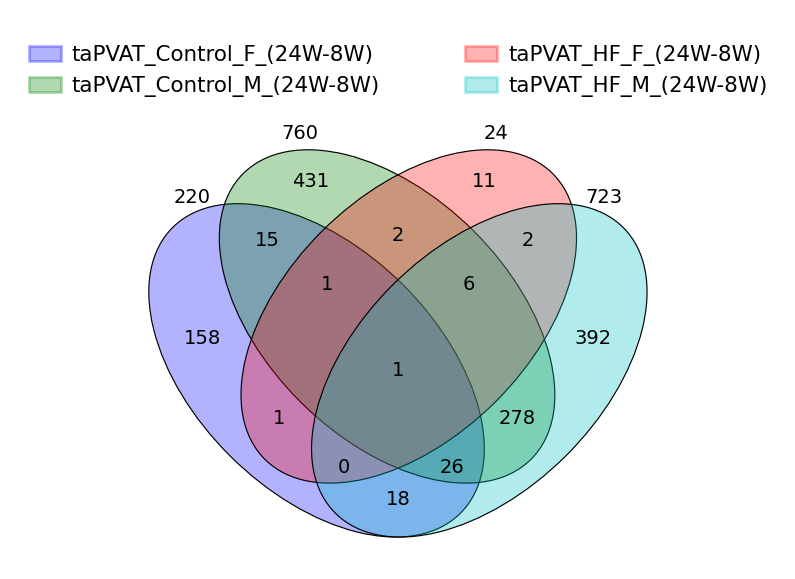

Immune_Cells


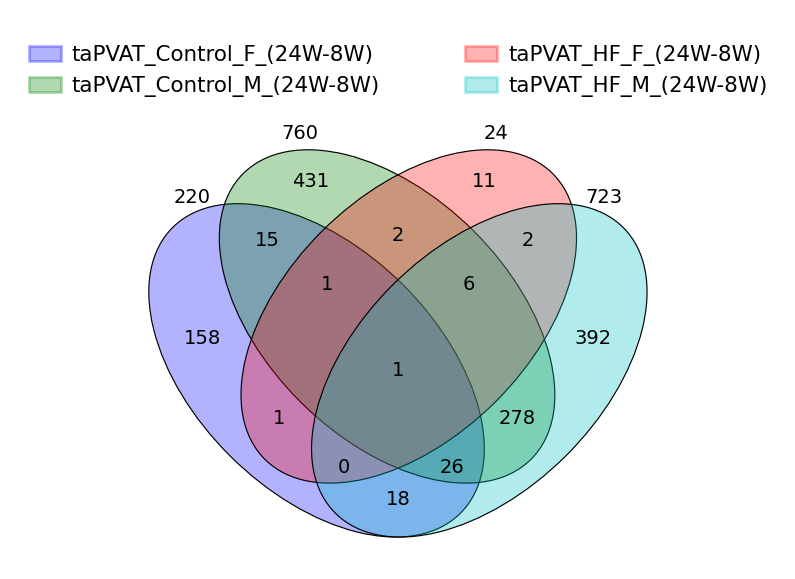

Endothelial_Cells


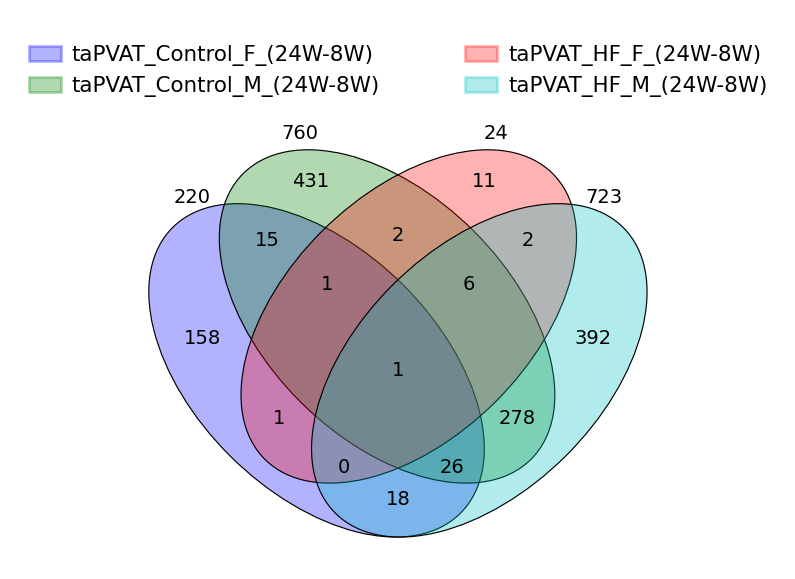

Pericytes


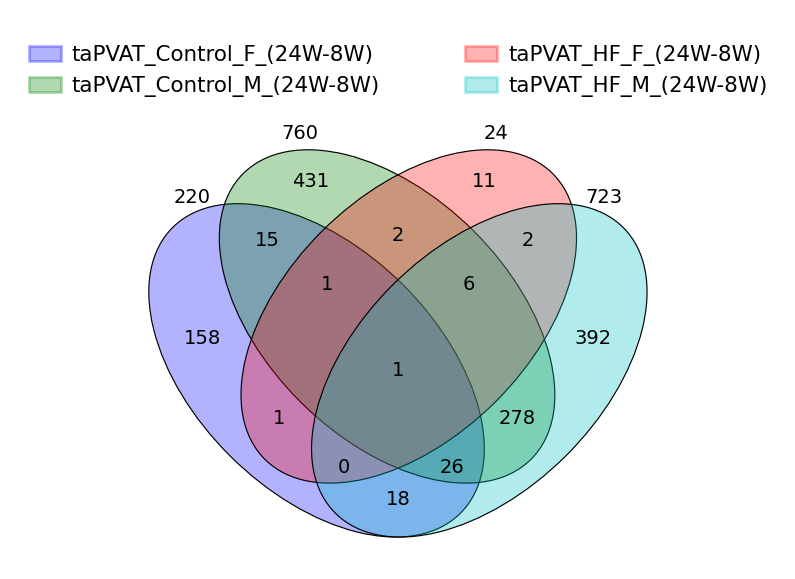

Mesothelial_Cells


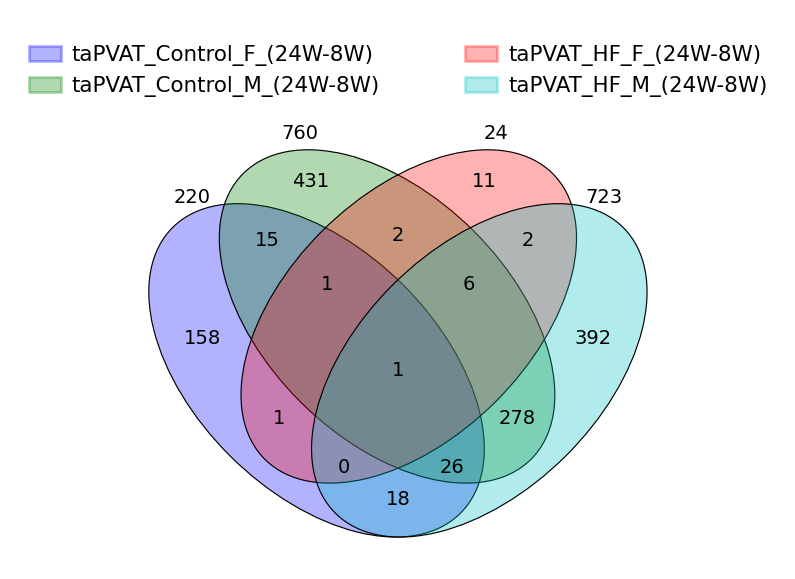

Fibroblasts


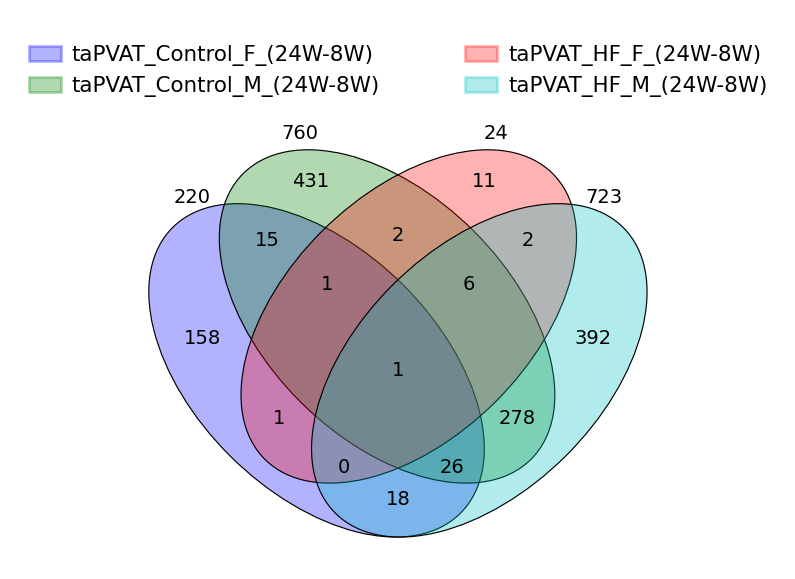

SMCs


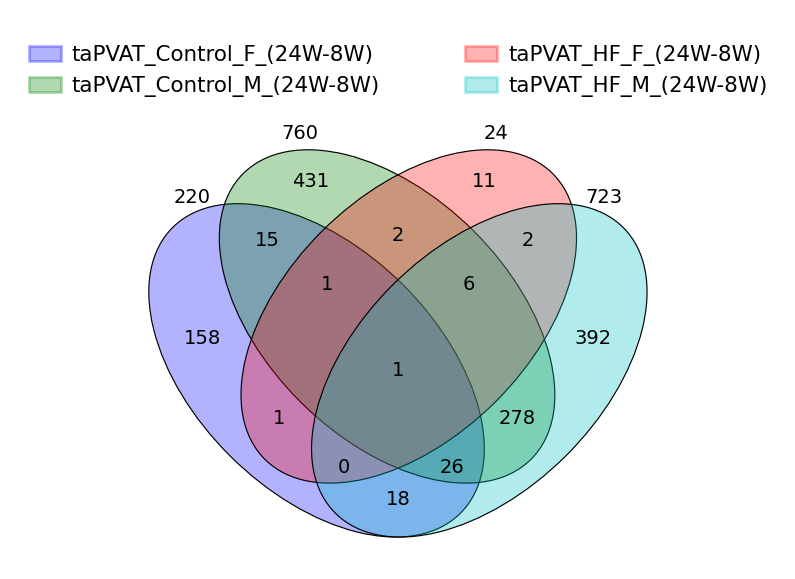

In [56]:
### Venn Diagrams
for celltype in degs_sig_down.celltype.unique():
    print(celltype)
    try:
        degs_sub = degs_sig_down.copy()#[degs_sig_down.celltype == celltype].copy()
        degs_sub = degs_sub[degs_sub.group == 'time']
        degs_sub = degs_sub[degs_sub.sub_id != 'None']
        degs_sub = degs_sub[degs_sub.sub_id_2 != 'None']
        degs_sub['treatment'] = 'taPVAT_' + degs_sub['sub_id'] + '_' + degs_sub['sub_id_2'] + '_(24W-8W)'

        grouped = degs_sub.groupby('treatment')['gene_id'].agg(['unique', 'count']).reset_index()
        sets = {
        grouped.iloc[0,0] : set(grouped.iloc[0,1]),
        grouped.iloc[1,0] : set(grouped.iloc[1,1]),
        grouped.iloc[2,0] : set(grouped.iloc[2,1]),
        grouped.iloc[3,0] : set(grouped.iloc[3,1])
        }

        venny4py(sets=sets, save = True)
        plt.show()
    except Exception as e:
        print("error in " + celltype)

In [ ]:
###Compare Log2 Fold Changes

In [68]:
deseqResults_all

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id,celltype,group,group1,group2,subset,sub_id,subset_2,subset_id_2,level,sub_2,sub_id_2
49509,3110082J24Rik,31.829409,0.158600,0.378698,0.418802,0.675361,0.827128,3110082J24Rik,Adipocytes,diet,Control,HF,None,None,None,None,high,None,None
49510,4930455H04Rik,3.198805,0.265127,0.485183,0.546447,0.584759,0.767462,4930455H04Rik,Adipocytes,diet,Control,HF,None,None,None,None,high,None,None
49511,6330411D24Rik,4.262944,0.999924,0.665392,1.502761,0.132901,0.323154,6330411D24Rik,Adipocytes,diet,Control,HF,None,None,None,None,high,None,None
49512,A1cf,0.922657,1.381442,0.982203,1.406473,0.159584,0.361213,A1cf,Adipocytes,diet,Control,HF,None,None,None,None,high,None,None
49513,AABR07000398.1,8702.402830,-0.096636,0.230120,-0.419939,0.674530,0.826806,AABR07000398.1,Adipocytes,diet,Control,HF,None,None,None,None,high,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659706,Zzef1,2.744123,-0.330367,1.016586,-0.324977,0.745198,0.999984,Zzef1,SMCs,diet,Control,HF,time,24W,None,None,low,sex,F
5659707,Zzz3,2.144385,-0.422029,1.096022,-0.385055,0.700197,0.999984,Zzz3,SMCs,diet,Control,HF,time,24W,None,None,low,sex,F
5659708,mrpl11,0.903071,-0.469128,2.124507,-0.220818,0.825235,0.999984,mrpl11,SMCs,diet,Control,HF,time,24W,None,None,low,sex,F
5659709,mrpl24,0.389941,1.047237,2.288470,0.457614,0.647230,0.999984,mrpl24,SMCs,diet,Control,HF,time,24W,None,None,low,sex,F


In [75]:
df_1 = deseqResults_all[(deseqResults_all.group == 'time') & (deseqResults_all.sub_id == 'Control') & (deseqResults_all.sub_id_2 == 'M')].reset_index().copy()
df_1 = df_1[['gene_id','stat', 'pvalue','padj','log2FoldChange', 'celltype', 'group', 'sub_id', 'sub_id_2']].copy()
df_2 = deseqResults_all[(deseqResults_all.group == 'time') & (deseqResults_all.sub_id == 'HF') & (deseqResults_all.sub_id_2 == 'M')].reset_index().copy()
df_2 = df_2[['gene_id','stat', 'pvalue','padj','log2FoldChange', 'celltype', 'group', 'sub_id', 'sub_id_2']].copy()

In [80]:
df_1[df_1.celltype == 'Adipocytes'].reset_index()

,index,gene_id,stat,pvalue,padj,log2FoldChange,celltype,group,sub_id,sub_id_2
0,5828,3110082J24Rik,-2.515052,0.011901,0.159181,-1.447707,Adipocytes,time,Control,M
1,5829,AABR07000398.1,-1.938086,0.052613,0.354663,-0.837022,Adipocytes,time,Control,M
2,5830,AABR07000544.1,0.281573,0.778271,0.944307,0.190901,Adipocytes,time,Control,M
3,5831,AABR07001592.2,2.834932,0.004584,0.088698,1.601612,Adipocytes,time,Control,M
4,5832,AABR07001942.1,0.355082,0.722528,0.925952,0.287023,Adipocytes,time,Control,M
...,...,...,...,...,...,...,...,...,...,...
12554,18382,Zzz3,-0.133327,0.893935,0.975827,-0.026061,Adipocytes,time,Control,M
12555,18383,mrpl11,0.611176,0.541083,0.858013,0.147447,Adipocytes,time,Control,M
12556,18384,mrpl24,0.542190,0.587688,0.877447,0.118682,Adipocytes,time,Control,M
12557,18385,mrpl9,-0.763504,0.445163,0.805348,-0.210712,Adipocytes,time,Control,M


In [81]:
df_2[df_2.celltype == 'Adipocytes'].reset_index()

,index,gene_id,stat,pvalue,padj,log2FoldChange,celltype,group,sub_id,sub_id_2
0,6938,3110082J24Rik,-1.534647,1.248704e-01,4.183009e-01,-1.060278,Adipocytes,time,HF,M
1,6939,4930455H04Rik,-0.449986,6.527207e-01,8.705391e-01,-0.347172,Adipocytes,time,HF,M
2,6940,AABR07000398.1,-6.201106,5.606779e-10,1.705171e-07,-1.360440,Adipocytes,time,HF,M
3,6941,AABR07000544.1,1.539646,1.236467e-01,4.153563e-01,0.861932,Adipocytes,time,HF,M
4,6942,AABR07001592.2,1.114050,2.652576e-01,6.056415e-01,0.558377,Adipocytes,time,HF,M
...,...,...,...,...,...,...,...,...,...,...
13032,19970,Zzz3,-0.716327,4.737894e-01,7.728349e-01,-0.176671,Adipocytes,time,HF,M
13033,19971,mrpl11,-0.092158,9.265722e-01,9.774212e-01,-0.019872,Adipocytes,time,HF,M
13034,19972,mrpl24,-0.137774,8.904193e-01,9.662714e-01,-0.028710,Adipocytes,time,HF,M
13035,19973,mrpl9,-2.432908,1.497811e-02,1.307026e-01,-0.690386,Adipocytes,time,HF,M


In [82]:
df_1_a = df_1[df_1.celltype == 'Adipocytes'].reset_index().copy()
df_2_a = df_2[df_2.celltype == 'Adipocytes'].reset_index().copy()

In [83]:
df_1_a.index = df_1_a.gene_id

In [85]:
df_2_a.index = df_2_a.gene_id

In [97]:
for column in df_1_a.columns:
    print(np.unique(df_1_a[column].isna()))

[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False  True]


In [99]:
df_1_a['log2FoldChange_Control'] = df_1_a['log2FoldChange']
df_1_a['log2FoldChange_HF'] = df_2_a['log2FoldChange']
df_1_a = df_1_a.dropna()
df_1_a

,index,gene_id,stat,pvalue,padj,log2FoldChange,celltype,group,sub_id,sub_id_2,log2FoldChange_control,log2FoldChange_Control,log2FoldChange_HF
gene_id,,,,,,,,,,,,,
3110082J24Rik,5828,3110082J24Rik,-2.515052,0.011901,0.159181,-1.447707,Adipocytes,time,Control,M,-1.447707,-1.447707,-1.060278
AABR07000398.1,5829,AABR07000398.1,-1.938086,0.052613,0.354663,-0.837022,Adipocytes,time,Control,M,-0.837022,-0.837022,-1.360440
AABR07000544.1,5830,AABR07000544.1,0.281573,0.778271,0.944307,0.190901,Adipocytes,time,Control,M,0.190901,0.190901,0.861932
AABR07001592.2,5831,AABR07001592.2,2.834932,0.004584,0.088698,1.601612,Adipocytes,time,Control,M,1.601612,1.601612,0.558377
AABR07001942.1,5832,AABR07001942.1,0.355082,0.722528,0.925952,0.287023,Adipocytes,time,Control,M,0.287023,0.287023,0.706007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zzz3,18382,Zzz3,-0.133327,0.893935,0.975827,-0.026061,Adipocytes,time,Control,M,-0.026061,-0.026061,-0.176671
mrpl11,18383,mrpl11,0.611176,0.541083,0.858013,0.147447,Adipocytes,time,Control,M,0.147447,0.147447,-0.019872
mrpl24,18384,mrpl24,0.542190,0.587688,0.877447,0.118682,Adipocytes,time,Control,M,0.118682,0.118682,-0.028710


In [101]:
df_1_a['log2FC_diff'] = np.abs(df_1_a['log2FoldChange_HF']) - np.abs(df_1_a['log2FoldChange_Control'])

/tmp/local/40924749/ipykernel_3338678/2339277797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_a['log2FC_diff'] = np.abs(df_1_a['log2FoldChange_HF']) - np.abs(df_1_a['log2FoldChange_Control'])


In [102]:
df_1_a

,index,gene_id,stat,pvalue,padj,log2FoldChange,celltype,group,sub_id,sub_id_2,log2FoldChange_control,log2FoldChange_Control,log2FoldChange_HF,log2FC_diff
gene_id,,,,,,,,,,,,,,
3110082J24Rik,5828,3110082J24Rik,-2.515052,0.011901,0.159181,-1.447707,Adipocytes,time,Control,M,-1.447707,-1.447707,-1.060278,-0.387429
AABR07000398.1,5829,AABR07000398.1,-1.938086,0.052613,0.354663,-0.837022,Adipocytes,time,Control,M,-0.837022,-0.837022,-1.360440,0.523418
AABR07000544.1,5830,AABR07000544.1,0.281573,0.778271,0.944307,0.190901,Adipocytes,time,Control,M,0.190901,0.190901,0.861932,0.671032
AABR07001592.2,5831,AABR07001592.2,2.834932,0.004584,0.088698,1.601612,Adipocytes,time,Control,M,1.601612,1.601612,0.558377,-1.043235
AABR07001942.1,5832,AABR07001942.1,0.355082,0.722528,0.925952,0.287023,Adipocytes,time,Control,M,0.287023,0.287023,0.706007,0.418985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zzz3,18382,Zzz3,-0.133327,0.893935,0.975827,-0.026061,Adipocytes,time,Control,M,-0.026061,-0.026061,-0.176671,0.150610
mrpl11,18383,mrpl11,0.611176,0.541083,0.858013,0.147447,Adipocytes,time,Control,M,0.147447,0.147447,-0.019872,-0.127575
mrpl24,18384,mrpl24,0.542190,0.587688,0.877447,0.118682,Adipocytes,time,Control,M,0.118682,0.118682,-0.028710,-0.089972


<Axes: >

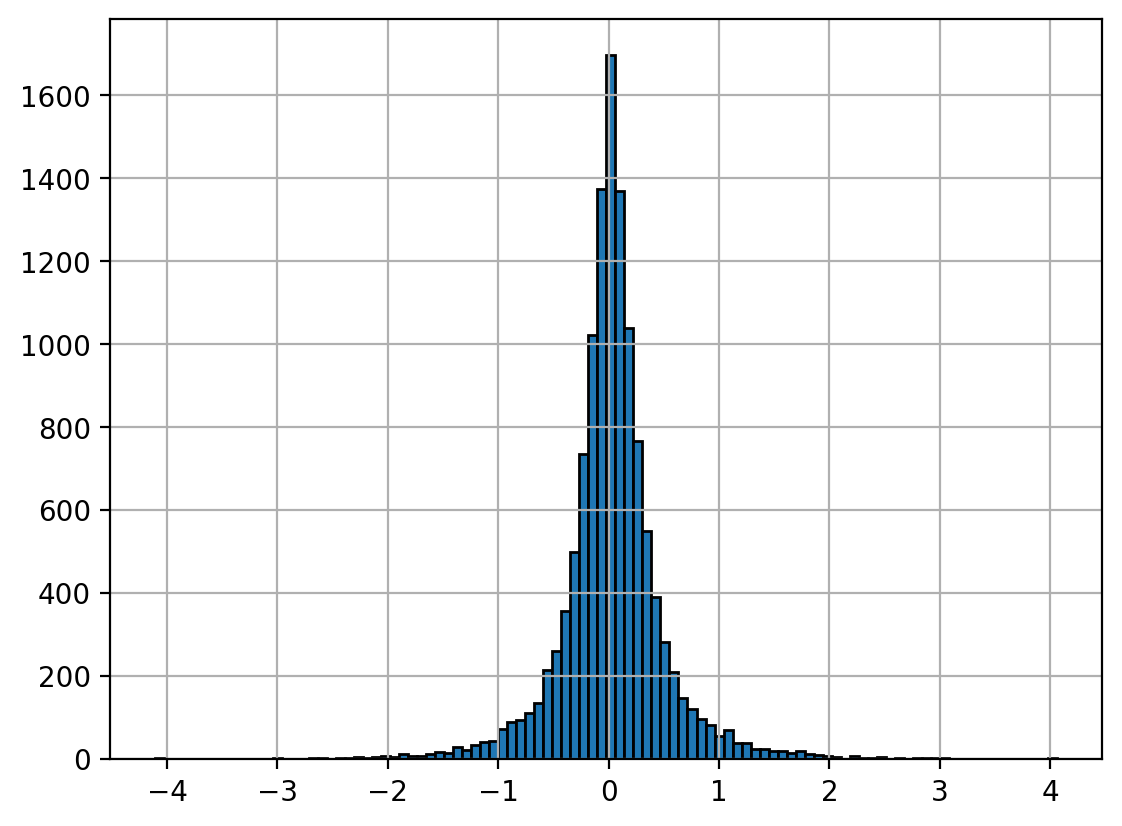

In [111]:
df_1_a['log2FC_diff'].hist(bins=100, edgecolor='black')

In [118]:
mean_1_a = np.mean(df_1_a['log2FC_diff'])

In [119]:
stdev_1_a = np.std(df_1_a['log2FC_diff'])

In [149]:
### outliers fall outside of 2 standard deviations from the mean
outliers = df_1_a[(df_1_a['log2FC_diff'] <= mean_1_a - (2*stdev_1_a)) | (df_1_a['log2FC_diff'] >= mean_1_a + (2*stdev_1_a))]

In [150]:
outliers[outliers.padj <= 0.05]

,index,gene_id,stat,pvalue,padj,log2FoldChange,celltype,group,sub_id,sub_id_2,log2FoldChange_control,log2FoldChange_Control,log2FoldChange_HF,log2FC_diff
gene_id,,,,,,,,,,,,,,
AABR07054614.1,5905,AABR07054614.1,3.846247,1.199410e-04,7.347995e-03,1.360644,Adipocytes,time,Control,M,1.360644,1.360644,2.898568,1.537925
Ablim2,6017,Ablim2,6.092316,1.112890e-09,4.991707e-07,1.560059,Adipocytes,time,Control,M,1.560059,1.560059,0.567160,-0.992899
Adamtsl4,6149,Adamtsl4,-5.911909,3.381662e-09,1.327197e-06,-2.603036,Adipocytes,time,Control,M,-2.603036,-2.603036,-1.073063,-1.529972
Adgra1,6168,Adgra1,4.382400,1.173788e-05,1.249289e-03,2.627925,Adipocytes,time,Control,M,2.627925,2.627925,0.516970,-2.110955
Adora1,6188,Adora1,5.162451,2.437373e-07,5.277753e-05,1.895592,Adipocytes,time,Control,M,1.895592,1.895592,0.400302,-1.495290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wnt5b,17835,Wnt5b,11.394837,4.436574e-30,5.571893e-26,2.863102,Adipocytes,time,Control,M,2.863102,2.863102,1.486461,-1.376641
Xbp1,17856,Xbp1,-3.764990,1.665559e-04,9.551486e-03,-2.157027,Adipocytes,time,Control,M,-2.157027,-2.157027,-0.720776,-1.436251
Xpnpep2,17866,Xpnpep2,5.020836,5.144718e-07,9.643659e-05,3.519003,Adipocytes,time,Control,M,3.519003,3.519003,1.595634,-1.923369


In [152]:
df_hf_high = outliers[(outliers.padj <= 0.05) & (outliers.log2FC_diff > 0)]
df_ctrl_high = outliers[(outliers.padj <= 0.05) & (outliers.log2FC_diff < 0)]

In [191]:
df_ctrl_high.to_csv('df_ctrl_high.csv')

In [168]:
df_hf_high.gene_id

gene_id
AABR07054614.1            AABR07054614.1
Alpl                                Alpl
Anxa1                              Anxa1
Arrb1                              Arrb1
Aspg                                Aspg
Cpa4                                Cpa4
Cst7                                Cst7
ENSRNOG00000038299    ENSRNOG00000038299
ENSRNOG00000063029    ENSRNOG00000063029
Lhfpl2                            Lhfpl2
Megf11                            Megf11
Pid1                                Pid1
Tfpi                                Tfpi
Tmeff2                            Tmeff2
Trhde                              Trhde
Name: gene_id, dtype: object

In [154]:
df_ctrl_high

,index,gene_id,stat,pvalue,padj,log2FoldChange,celltype,group,sub_id,sub_id_2,log2FoldChange_control,log2FoldChange_Control,log2FoldChange_HF,log2FC_diff
gene_id,,,,,,,,,,,,,,
Ablim2,6017,Ablim2,6.092316,1.112890e-09,4.991707e-07,1.560059,Adipocytes,time,Control,M,1.560059,1.560059,0.567160,-0.992899
Adamtsl4,6149,Adamtsl4,-5.911909,3.381662e-09,1.327197e-06,-2.603036,Adipocytes,time,Control,M,-2.603036,-2.603036,-1.073063,-1.529972
Adgra1,6168,Adgra1,4.382400,1.173788e-05,1.249289e-03,2.627925,Adipocytes,time,Control,M,2.627925,2.627925,0.516970,-2.110955
Adora1,6188,Adora1,5.162451,2.437373e-07,5.277753e-05,1.895592,Adipocytes,time,Control,M,1.895592,1.895592,0.400302,-1.495290
Agt,6243,Agt,-5.188817,2.116344e-07,4.663011e-05,-2.372548,Adipocytes,time,Control,M,-2.372548,-2.372548,-0.281842,-2.090706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wnt5b,17835,Wnt5b,11.394837,4.436574e-30,5.571893e-26,2.863102,Adipocytes,time,Control,M,2.863102,2.863102,1.486461,-1.376641
Xbp1,17856,Xbp1,-3.764990,1.665559e-04,9.551486e-03,-2.157027,Adipocytes,time,Control,M,-2.157027,-2.157027,-0.720776,-1.436251
Xpnpep2,17866,Xpnpep2,5.020836,5.144718e-07,9.643659e-05,3.519003,Adipocytes,time,Control,M,3.519003,3.519003,1.595634,-1.923369


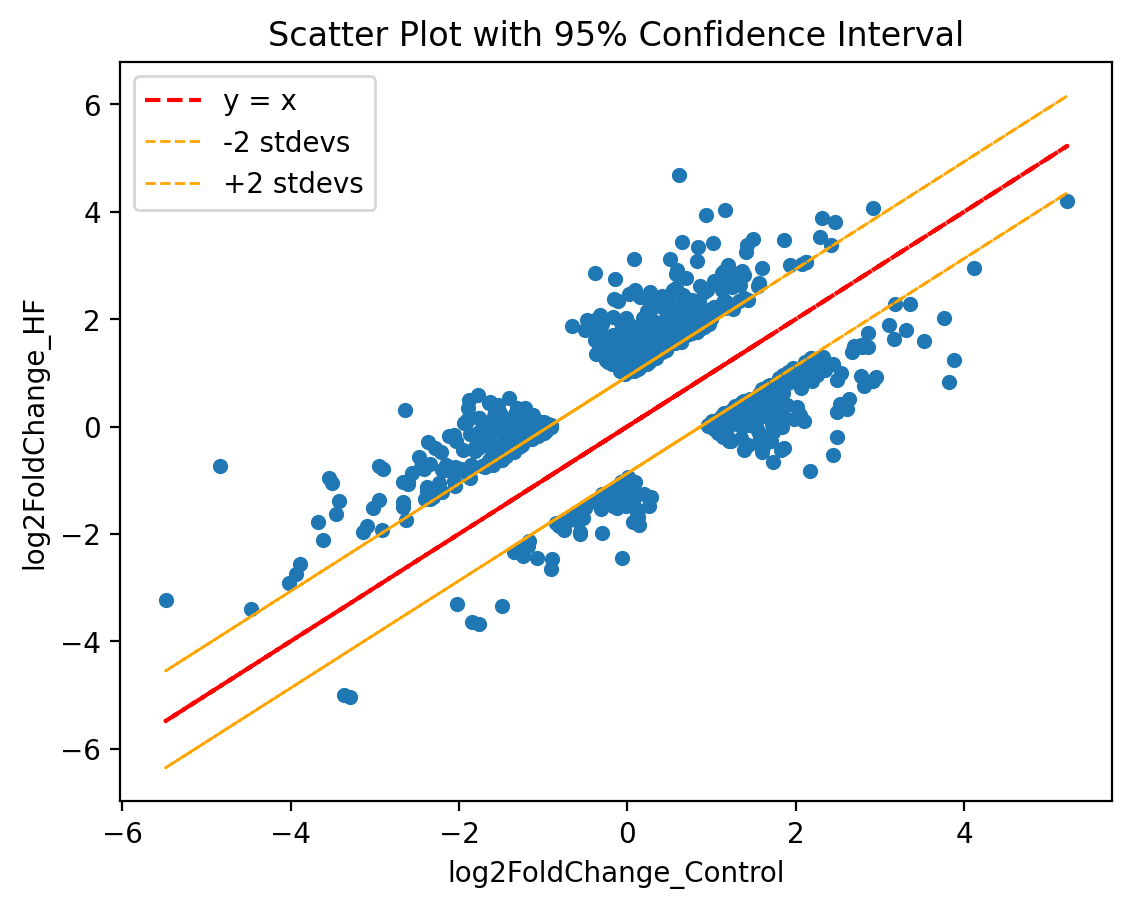

In [189]:
ax = outliers.plot(kind = "scatter", x = "log2FoldChange_Control", y = "log2FoldChange_HF")
#ax = df_1_a.plot(kind = "scatter", x = "log2FoldChange_Control", y = "log2FoldChange_HF")

plt.plot(outliers['log2FoldChange_Control'], outliers['log2FoldChange_Control'], color='red', linestyle='--', label='y = x')
plt.plot(outliers['log2FoldChange_Control'], outliers['log2FoldChange_Control'] + mean_1_a - (2*stdev_1_a), color='orange', linestyle='--', label='-2 stdevs', linewidth = 1)
plt.plot(outliers['log2FoldChange_Control'], outliers['log2FoldChange_Control'] + mean_1_a + (2*stdev_1_a), color='orange', linestyle='--', label='+2 stdevs', linewidth = 1)

plt.title('Scatter Plot with 95% Confidence Interval')
plt.legend()

plt.show()

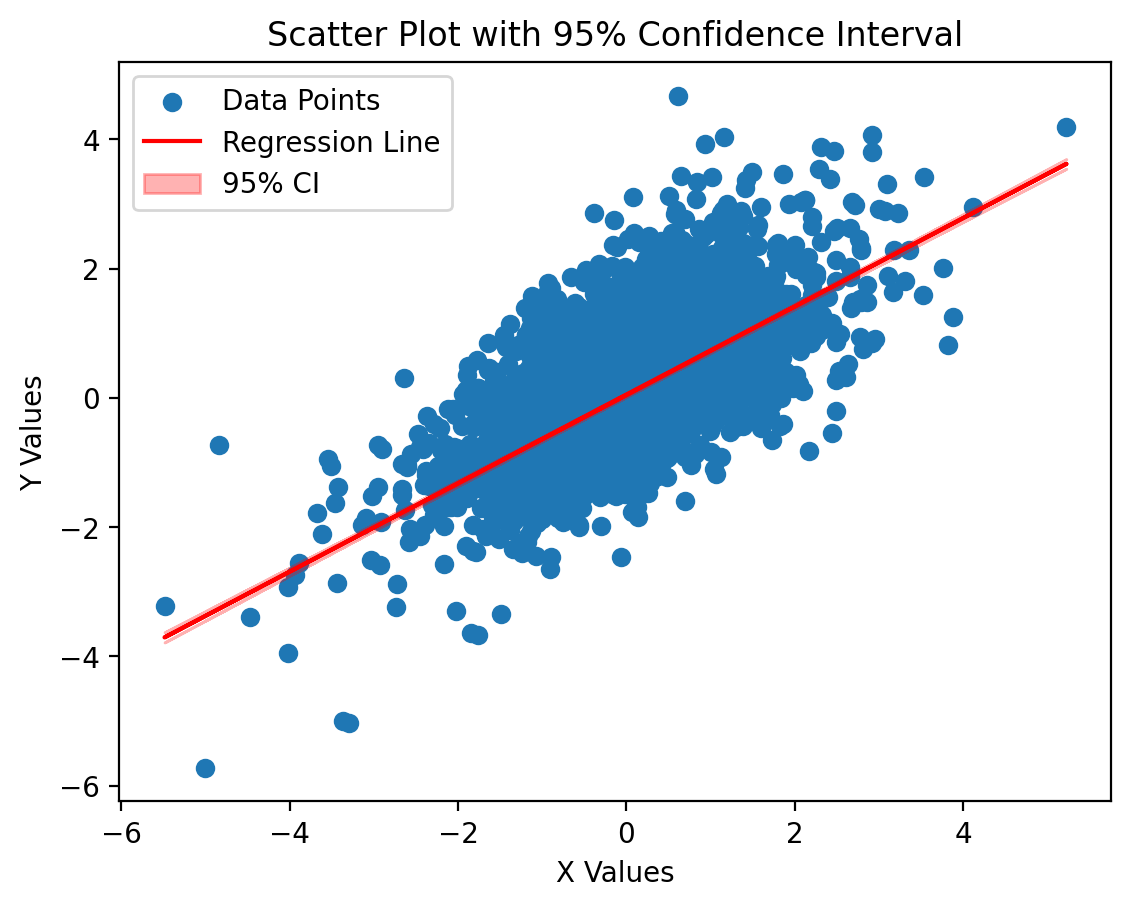

In [113]:
import statsmodels.api as sm

# Fit a linear regression model
X = sm.add_constant(df_1_a['log2FoldChange_Control'])  # Adds a constant term to the predictor
model = sm.OLS(df_1_a['log2FoldChange_HF'], X).fit()

# Predict y-values and confidence intervals
predictions = model.get_prediction(X)
pred_summary_frame = predictions.summary_frame(alpha=0.05)  # 95% CI

# Plot the scatter plot
plt.scatter(df_1_a['log2FoldChange_Control'], df_1_a['log2FoldChange_HF'], label='Data Points')

# Plot the regression line
plt.plot(df_1_a['log2FoldChange_Control'], pred_summary_frame['mean'], color='red', label='Regression Line')

# Plot the confidence interval
plt.fill_between(df_1_a['log2FoldChange_Control'], 
                 pred_summary_frame['mean_ci_lower'], 
                 pred_summary_frame['mean_ci_upper'], 
                 color='red', alpha=0.3, label='95% CI')

# Customize the plot
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot with 95% Confidence Interval')
plt.legend()
plt.show()


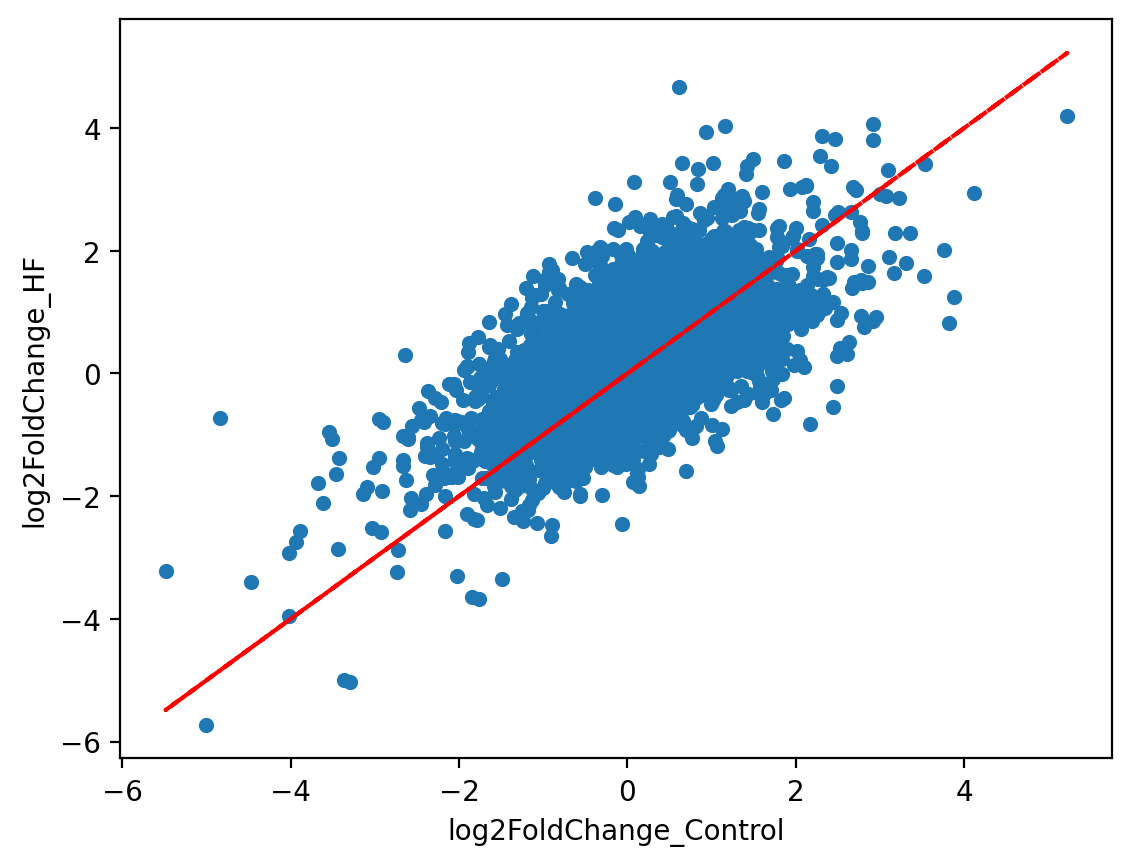

In [108]:
ax = df_1_a.plot(kind = "scatter", x = "log2FoldChange_Control", y = "log2FoldChange_HF")

plt.plot(df_1_a['log2FoldChange_Control'], df_1_a['log2FoldChange_Control'], color='red', linestyle='--', label='y = x')
plt.show()